# VISUALIZING NETWORK DATA

The cliche goes that the world is an increasingly interconnected place, and the connections between different entities are often best represented with a graph. Graphs are comprised of vertices (also often called "nodes") and edges connecting those nodes. In this assignment, we will learn how to visualize networks using the igraph package in R.

For this assignment, we will visualize __social networking data using anonymized data from Facebook__; this data was originally curated in a recent paper about computing social circles in social networks. In our visualizations, the vertices in our network will represent Facebook users and the edges will represent these users being Facebook friends with each other.

The first file we will use, [edges.csv](https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/edges.csv), contains variables V1 and V2, which label the endpoints of edges in our network. Each row represents a pair of users in our graph who are Facebook friends. For a pair of friends A and B, edges.csv will only contain a single row -- the smaller identifier will be listed first in this row. From this row, we will know that A is friends with B and B is friends with A.

The second file, [users.csv](https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/users.csv), contains information about the Facebook users, who are the vertices in our network. This file contains the following variables:

* **id**: A unique identifier for this user; this is the value that appears in the rows of edges.csv

* **gender**: An identifier for the gender of a user taking the values A and B. Because the data is anonymized, we don't know which value refers to males and which value refers to females.

* **school**: An identifier for the school the user attended taking the values A and AB (users with AB attended school A as well as another school B). Because the data is anonymized, we don't know the schools represented by A and B.

* **locale**: An identifier for the locale of the user taking the values A and B. Because the data is anonymized, we don't know which value refers to what locale.

In [1]:
edges = read.csv('data/edges.csv')
users = read.csv('data/users.csv')

In [2]:
str(edges)
str(users)

'data.frame':	146 obs. of  2 variables:
 $ V1: int  4019 4023 4023 4027 3988 3982 3994 3998 3993 3982 ...
 $ V2: int  4026 4031 4030 4032 4021 3986 3998 3999 3995 4021 ...
'data.frame':	59 obs. of  4 variables:
 $ id    : int  3981 3982 3983 3984 3985 3986 3987 3988 3989 3990 ...
 $ gender: Factor w/ 3 levels "","A","B": 2 3 3 3 3 3 2 3 3 2 ...
 $ school: Factor w/ 3 levels "","A","AB": 2 1 1 1 1 2 1 1 2 1 ...
 $ locale: Factor w/ 3 levels "","A","B": 3 3 3 3 3 3 2 3 3 2 ...


In [6]:
table(users$locale, users$school)

   
        A AB
     3  0  0
  A  6  0  0
  B 31 17  2

In [8]:
table(users$gender, users$school)

   
        A AB
     1  1  0
  A 11  3  1
  B 28 13  1

We will be using the igraph package to visualize networks; install and load this package using the install.packages and library commands.

We can create a new graph object using the graph.data.frame() function. Based on ?graph.data.frame, which of the following commands will create a graph g describing our social network, with the attributes of each user correctly loaded?

Note: A directed graph is one where the edges only go one way -- they point from one vertex to another. The other option is an undirected graph, which means that the relations between the vertices are symmetric.

In [10]:
# install.packages("igraph")
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [11]:
?graph.data.frame

as_data_frame {igraph},R Documentation
x,An igraph object.
what,"Character constant, whether to return info about vertices, edges, or both. The default is ‘edges’."
d,A data frame containing a symbolic edge list in the first two columns. Additional columns are considered as edge attributes. Since version 0.7 this argument is coerced to a data frame with as.data.frame.
directed,"Logical scalar, whether or not to create a directed graph."
vertices,"A data frame with vertex metadata, or NULL. See details below. Since version 0.7 this argument is coerced to a data frame with as.data.frame, if not NULL."
...,Passed to graph_from_data_frame.


In [12]:
g = graph.data.frame(edges, FALSE, users)

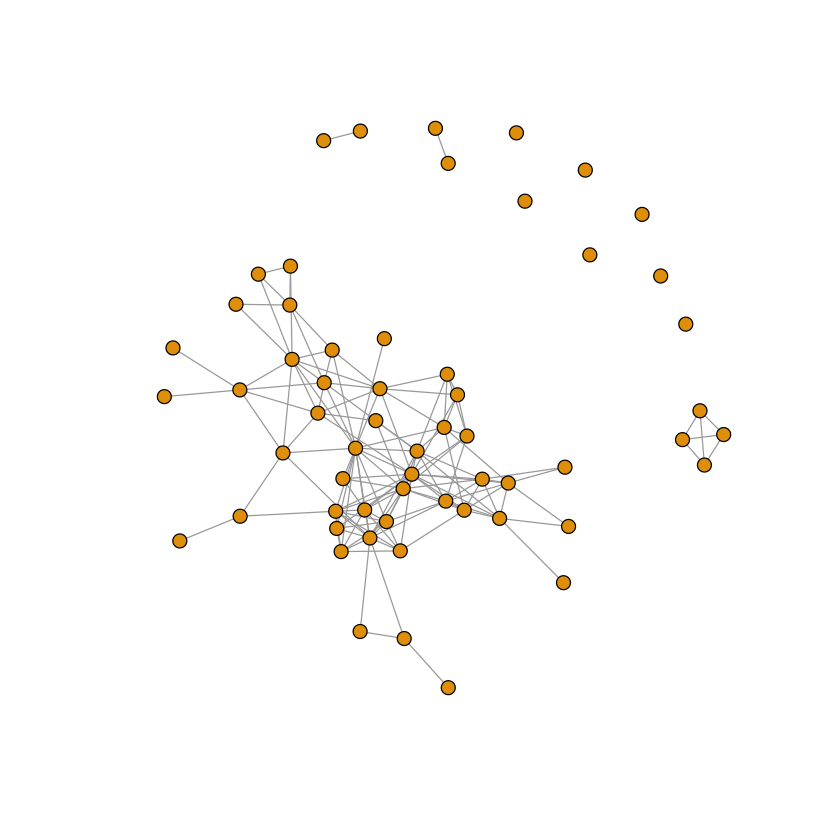

In [14]:
options(jupyter.plot_mimetypes = 'image/png')
plot(g, vertex.size=5, vertex.label=NA)

In [15]:
gDeg = degree(g)

In [16]:
table(gDeg)

gDeg
 0  1  2  3  4  5  6  7  8  9 10 11 13 17 18 
 7 10  4  9  1  4  4  3  6  2  4  1  2  1  1 

## Changing the size
In a network, it's often visually useful to draw attention to "important" nodes in the network. While this might mean different things in different contexts, in a social network we might consider a user with a large number of friends to be an important user. From the previous problem, we know this is the same as saying that nodes with a high degree are important users.

To visually draw attention to these nodes, we will change the size of the vertices so the vertices with high degrees are larger. To do this, we will change the "size" attribute of the vertices of our graph to be an increasing function of their degrees:

V(g)$size = degree(g)/2+2

Now that we have specified the vertex size of each vertex, we will no longer use the vertex.size parameter when we plot our graph:

plot(g, vertex.label=NA)

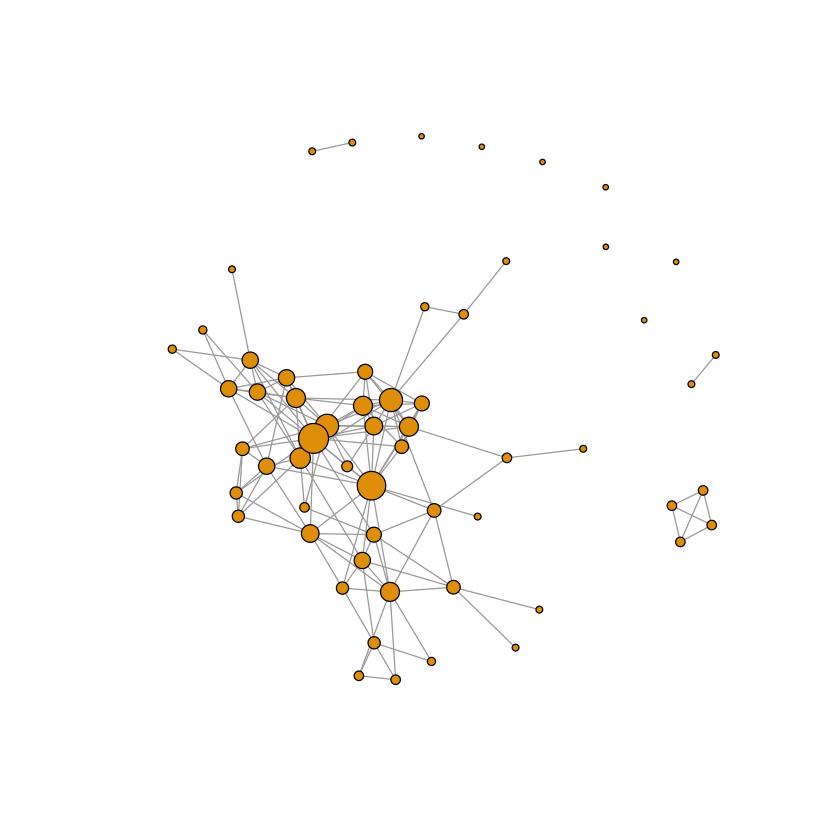

In [17]:
V(g)$size = degree(g)/2+2
plot(g, vertex.label=NA)

## Coloring Vertices

Thus far, we have changed the "size" attributes of our vertices. However, we can also change the colors of vertices to capture additional information about the Facebook users we are depicting.

When changing the size of nodes, we first obtained the vertices of our graph with V(g) and then accessed the the size attribute with V(g)\$size. To change the color, we will update the attribute V(g)\$color.

To color the vertices based on the gender of the user, we will need access to that variable. When we created our graph g, we provided it with the data frame users, which had variables gender, school, and locale. These are now stored as attributes V(g)\$gender, V(g)\$school, and V(g)\$locale.

We can update the colors by setting the color to black for all vertices, than setting it to red for the vertices with gender A and setting it to gray for the vertices with gender B:

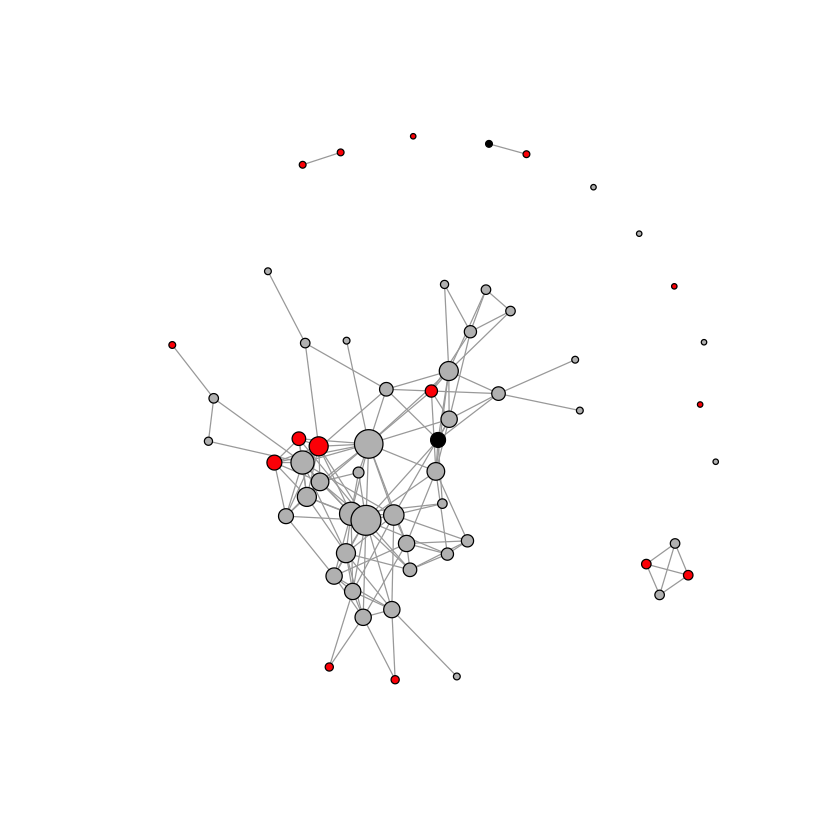

In [18]:
V(g)$color = "black"

V(g)$color[V(g)$gender == "A"] = "red"

V(g)$color[V(g)$gender == "B"] = "gray"

V(g)$size = degree(g)/2+2
plot(g, vertex.label=NA)

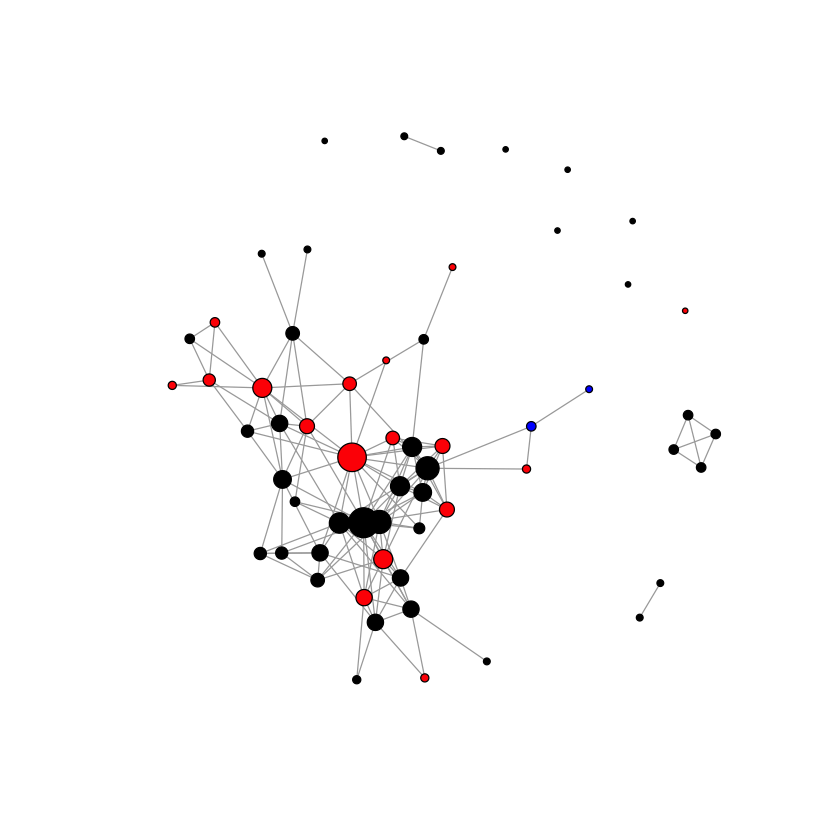

In [19]:
V(g)$color = "black"

V(g)$color[V(g)$school == "A"] = "red"

V(g)$color[V(g)$school == "AB"] = "blue"

V(g)$size = degree(g)/2+2
plot(g, vertex.label=NA)

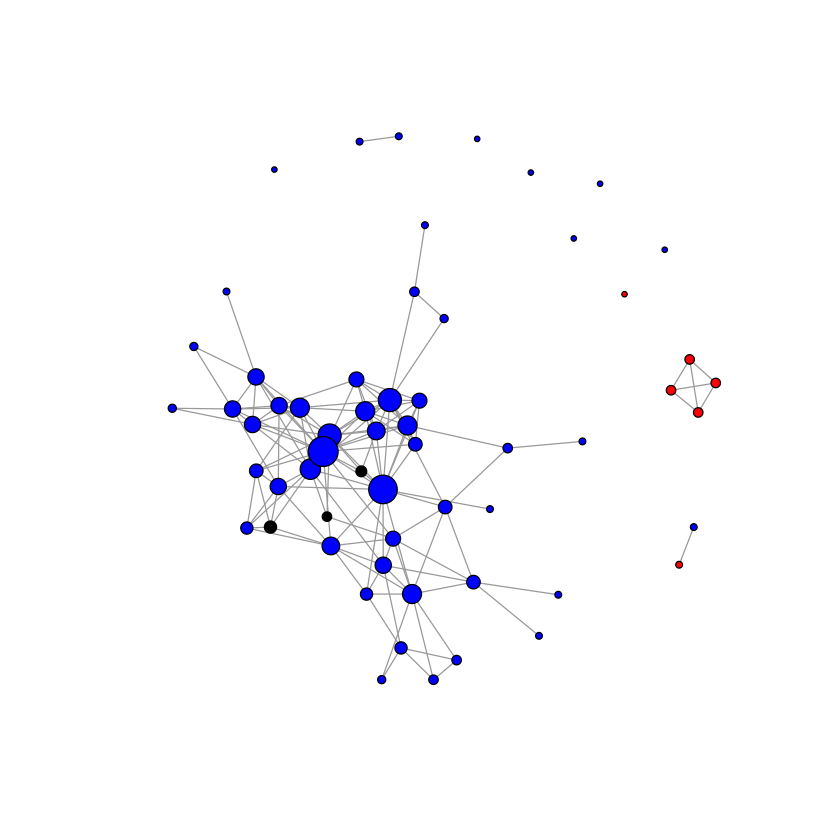

In [20]:
V(g)$color = "black"

V(g)$color[V(g)$locale == "A"] = "red"

V(g)$color[V(g)$locale == "B"] = "blue"

V(g)$size = degree(g)/2+2
plot(g, vertex.label=NA)

In [21]:
?igraph.plotting

Drawing graphs {igraph},R Documentation


In [22]:
?rglplot

rglplot {igraph},R Documentation
x,The graph to plot.
...,"Additional arguments, see igraph.plotting for the details"


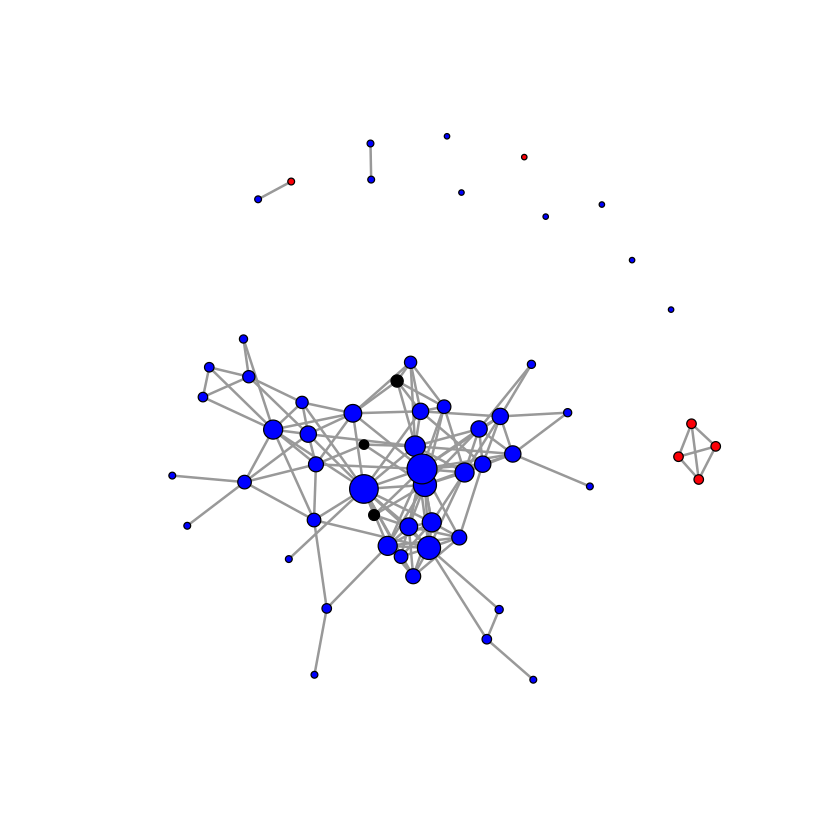

In [23]:
plot(g, vertex.label=NA, edge.width=2)

In [27]:
# rglplot(g)